# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ".../cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [4]:
city_pd=pd.DataFrame(cities,columns=["City"])
city_pd.head()

,City
0,ouro preto do oeste
1,hambantota
2,college
3,yatou
4,devils lake


In [5]:
type(cities)

list

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
params={"appid":weather_api_key}
url = "http://api.openweathermap.org/data/2.5/weather?"
responses=[]
params
for x,row in city_pd.iterrows():
    params["q"]={row["City"]}
    response=requests.get(url,params=params).json()
    responses.append(response)

In [7]:
print("Beginning Data Retrieval")
print("--------------------------------")

for x,row in city_pd.iterrows():
        try:
            print(f"Processing Record {x} of Set 1|{responses [x]['name']}")
        except:
            print(f"City not found. Skipping...")
                                
print("--------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 0 of Set 1|Ouro Preto do Oeste
Processing Record 1 of Set 1|Hambantota
Processing Record 2 of Set 1|College
Processing Record 3 of Set 1|Yatou
Processing Record 4 of Set 1|Devils Lake
Processing Record 5 of Set 1|San Juan del Cesar
Processing Record 6 of Set 1|Kapaa
Processing Record 7 of Set 1|Opuwo
Processing Record 8 of Set 1|Raudeberg
City not found. Skipping...
Processing Record 10 of Set 1|Faanui
Processing Record 11 of Set 1|Vila Franca do Campo
Processing Record 12 of Set 1|Atar
Processing Record 13 of Set 1|Dhidhdhoo
Processing Record 14 of Set 1|São Mateus do Sul
Processing Record 15 of Set 1|Chokurdakh
Processing Record 16 of Set 1|Hasaki
Processing Record 17 of Set 1|Aykhal
Processing Record 18 of Set 1|Vestmannaeyjar
Processing Record 19 of Set 1|The Valley
Processing Record 20 of Set 1|Albany
Processing Record 21 of Set 1|Ascension
Processing Record 22 of Set 1|Cape Town
Processing Record 23 of Se

In [8]:
responses

[{'coord': {'lon': -62.22, 'lat': -10.75},
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10d'}],
  'base': 'stations',
  'main': {'temp': 308.19,
   'feels_like': 309.39,
   'temp_min': 308.19,
   'temp_max': 308.19,
   'pressure': 1002,
   'humidity': 40,
   'sea_level': 1002,
   'grnd_level': 979},
  'visibility': 10000,
  'wind': {'speed': 3.16, 'deg': 323},
  'rain': {'1h': 0.133},
  'clouds': {'all': 45},
  'dt': 1603829139,
  'sys': {'country': 'BR', 'sunrise': 1603791545, 'sunset': 1603836366},
  'timezone': -14400,
  'id': 3924948,
  'name': 'Ouro Preto do Oeste',
  'cod': 200},
 {'coord': {'lon': 81.12, 'lat': 6.12},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 299.13,
   'feels_like': 301.36,
   'temp_min': 299.13,
   'temp_max': 299.13,
   'pressure': 1009,
   'humidity': 83,
   'sea_level': 1009,
   'grnd_level': 1008},
  'visibi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_pd["Cloudiness"]=""
city_pd["Country"]=""
city_pd["Date"]=""
city_pd["Humidity"]=""
city_pd["Lat"]=""
city_pd["Lng"]=""
city_pd["Max Temp"]=""
city_pd["Wind Speed"]=""
city_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ouro preto do oeste,,,,,,,,
1,hambantota,,,,,,,,
2,college,,,,,,,,
3,yatou,,,,,,,,
4,devils lake,,,,,,,,


In [10]:
nan_value = float("NaN")
for x,row in city_pd.iterrows():
    try:
        city_pd.loc[x,"City"]=responses[x]["name"]
        city_pd.loc[x,"Cloudiness"]=responses[x]["clouds"]["all"]
        city_pd.loc[x,"Country"]=responses[x]["sys"]["country"]
        city_pd.loc[x,"Date"]=responses[x]["dt"]
        city_pd.loc[x,"Humidity"]=responses[x]["main"]["humidity"]
        city_pd.loc[x,"Lat"]=responses[x]["coord"]["lat"]
        city_pd.loc[x,"Lng"]=responses[x]["coord"]["lon"]
        city_pd.loc[x,"Max Temp"]=responses[x]["main"]["temp_max"]
        city_pd.loc[x,"Wind Speed"]=responses[x]["wind"]["speed"]
    except:
        city_pd.replace("", nan_value, inplace=True)
        city_pd.dropna(subset = ["Cloudiness"], inplace=True)
        
city_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ouro Preto do Oeste,45.0,BR,1.603829e+09,40.0,-10.75,-62.22,308.19,3.16
1,Hambantota,74.0,LK,1.603829e+09,83.0,6.12,81.12,299.13,4.19
2,College,75.0,US,1.603829e+09,92.0,64.86,-147.80,270.15,2.58
3,Yatou,97.0,CN,1.603829e+09,51.0,37.15,122.38,285.56,4.79
4,Devils Lake,90.0,US,1.603829e+09,80.0,48.11,-98.87,274.15,8.70


In [11]:
city_pd.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [12]:
city_pd["Date"]=pd.to_datetime(city_pd["Date"],unit='s')

In [13]:
city_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ouro Preto do Oeste,45.0,BR,2020-10-27 20:05:39,40.0,-10.75,-62.22,308.19,3.16
1,Hambantota,74.0,LK,2020-10-27 20:05:40,83.0,6.12,81.12,299.13,4.19
2,College,75.0,US,2020-10-27 20:05:40,92.0,64.86,-147.80,270.15,2.58
3,Yatou,97.0,CN,2020-10-27 19:56:46,51.0,37.15,122.38,285.56,4.79
4,Devils Lake,90.0,US,2020-10-27 20:00:47,80.0,48.11,-98.87,274.15,8.70


In [14]:
city_pd.to_csv (r'cities.csv', index = False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

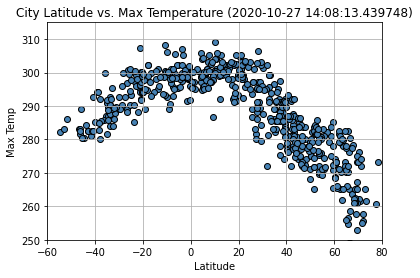

In [15]:
x=city_pd["Lat"]
y=city_pd["Max Temp"]
td = pd.to_datetime("today")
plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolor="black")
plt.ylim(250,315)
plt.xlim(-60,80)
plt.title(f"City Latitude vs. Max Temperature ({td})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()
plt.savefig("output1.png")
plt.show()

#### Latitude vs. Humidity Plot

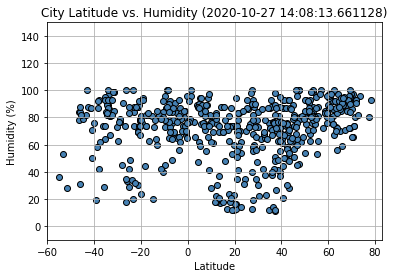

In [16]:
x=city_pd["Lat"]
y=city_pd["Humidity"]
td = pd.to_datetime("today")
plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolor="black")
plt.ylim(-10,150)
plt.xlim(-60,83)
plt.title(f"City Latitude vs. Humidity ({td})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

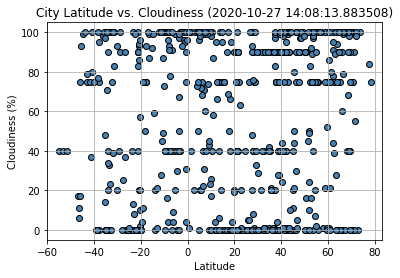

In [17]:
x=city_pd["Lat"]
y=city_pd["Cloudiness"]
td = pd.to_datetime("today")
plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolor="black")
plt.ylim(-5,105)
plt.xlim(-60,83)
plt.title(f"City Latitude vs. Cloudiness ({td})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

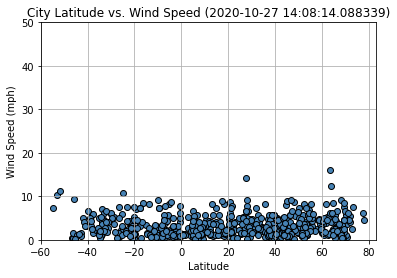

In [18]:
x=city_pd["Lat"]
y=city_pd["Wind Speed"]
td = pd.to_datetime("today")
plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolor="black")
plt.ylim(0,50)
plt.xlim(-60,83)
plt.title(f"City Latitude vs. Wind Speed ({td})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output4.png")
plt.show()

## Linear Regression

In [19]:
#intercept, slope, corr_coeff = plot_linear_regression(x, y)
#plt.show()
north_pd=pd.DataFrame(columns=("City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"))
north_pd
south_pd=pd.DataFrame(columns=("City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"))
south_pd

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [20]:
# Create Northern and Southern Hemisphere DataFrames
#x >= y               ... x is greater than or equal to y
#x <= y               ... x is less than or equal to y
north_pd=city_pd.loc[city_pd["Lat"]>0.01]
south_pd=city_pd.loc[city_pd["Lat"]<-0.01]

In [21]:
north_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Hambantota,74.0,LK,2020-10-27 20:05:40,83.0,6.12,81.12,299.13,4.19
2,College,75.0,US,2020-10-27 20:05:40,92.0,64.86,-147.80,270.15,2.58
3,Yatou,97.0,CN,2020-10-27 19:56:46,51.0,37.15,122.38,285.56,4.79
4,Devils Lake,90.0,US,2020-10-27 20:00:47,80.0,48.11,-98.87,274.15,8.70
5,San Juan del Cesar,87.0,CO,2020-10-27 20:05:40,61.0,10.77,-73.00,304.00,3.79


In [22]:
def k_to_c(k):
    c = k-273.15
    return c

In [23]:
south_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ouro Preto do Oeste,45.0,BR,2020-10-27 20:05:39,40.0,-10.75,-62.22,308.19,3.16
7,Opuwo,50.0,NA,2020-10-27 19:56:59,44.0,-18.06,13.84,294.82,4.06
10,Faanui,99.0,PF,2020-10-27 19:57:39,82.0,-16.48,-151.75,299.76,8.51
14,São Mateus do Sul,0.0,BR,2020-10-27 20:03:33,33.0,-25.87,-50.38,299.42,2.17
22,Cape Town,20.0,ZA,2020-10-27 20:03:05,82.0,-33.93,18.42,290.37,2.10


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

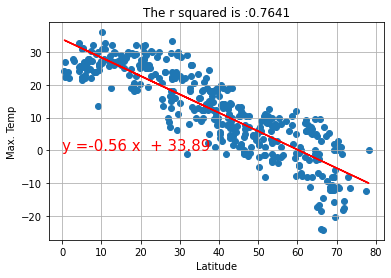

In [24]:
x_values=north_pd["Lat"]
y_values= k_to_c(north_pd["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
regress_values = x_values * slope + intercept
line_eq = f"y ={round(slope,2)} x  + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.title(f"The r squared is :{round(r_squared,4)}")
plt.savefig("N H - Max Temp vs. Latitude Linear Regression.png")
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

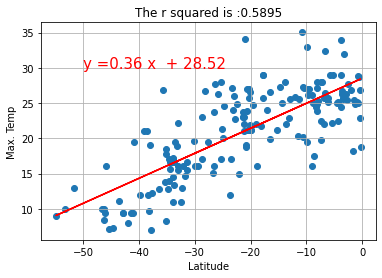

In [25]:
x_values=south_pd["Lat"]
y_values= k_to_c(south_pd["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
regress_values = x_values * slope + intercept
line_eq = f"y ={round(slope,2)} x  + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.title(f"The r squared is :{round(r_squared,4)}")
plt.savefig("S H - Max Temp vs. Latitude Linear Regression.png")
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

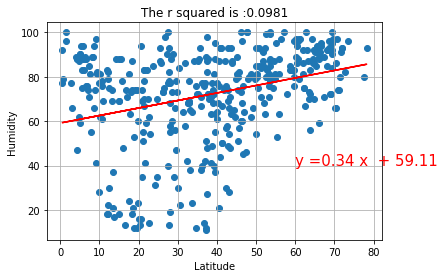

In [26]:
x_values=north_pd["Lat"]
y_values= north_pd["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
regress_values = x_values * slope + intercept
line_eq = f"y ={round(slope,2)} x  + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(60,40),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title(f"The r squared is :{round(r_squared,4)}")
plt.savefig("N H -Humidity (%) vs. Latitude Linear Regression.png")
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

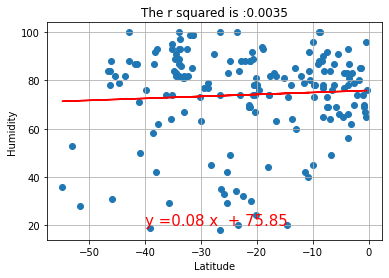

In [27]:
x_values=south_pd["Lat"]
y_values= south_pd["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
regress_values = x_values * slope + intercept
line_eq = f"y ={round(slope,2)} x  + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title(f"The r squared is :{round(r_squared,4)}")
plt.savefig("S H -Humidity (%) vs. Latitude Linear Regression.png")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

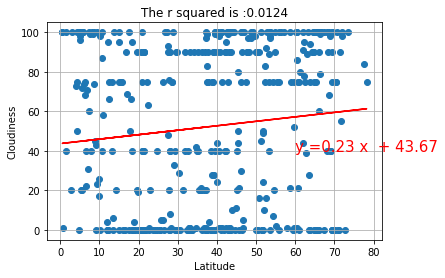

In [28]:
x_values=north_pd["Lat"]
y_values= north_pd["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
regress_values = x_values * slope + intercept
line_eq = f"y ={round(slope,2)} x  + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(60,40),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title(f"The r squared is :{round(r_squared,4)}")
plt.savefig("N H -Cloudiness (%) vs. Latitude Linear Regression.png")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

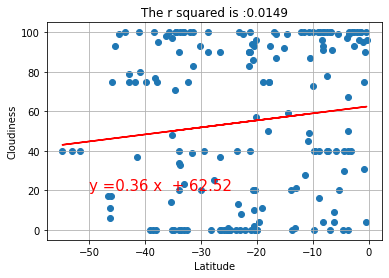

In [29]:
x_values=south_pd["Lat"]
y_values= south_pd["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
regress_values = x_values * slope + intercept
line_eq = f"y ={round(slope,2)} x  + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title(f"The r squared is :{round(r_squared,4)}")
plt.savefig("S H -Cloudiness (%) vs. Latitude Linear Regression.png")
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

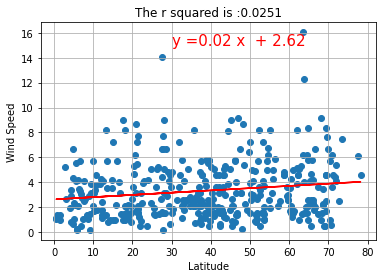

In [30]:
x_values=north_pd["Lat"]
y_values= north_pd["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
regress_values = x_values * slope + intercept
line_eq = f"y ={round(slope,2)} x  + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(30,15),fontsize=15,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.title(f"The r squared is :{round(r_squared,4)}")
plt.savefig("N H -Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

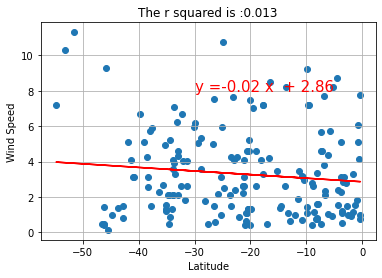

In [31]:
x_values=south_pd["Lat"]
y_values= south_pd["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
regress_values = x_values * slope + intercept
line_eq = f"y ={round(slope,2)} x  + {round(intercept,2)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-30,8),fontsize=15,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.title(f"The r squared is :{round(r_squared,4)}")
plt.savefig("S H -Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.grid()
plt.show()